In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/3-rotated2-rotated1-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/1-rotated3-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/4-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/1-rotated3-rotated2-rotated3.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/1-rotated2-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/1-rotated3-rotated1-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/3-rotated3-rotated1-rotated3-rotated1.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/3-rotated2.jpg
/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/3-rotated1-rotated2-rotated3-rotated1.jpg
/kaggle/input/bone-

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing import image

In [3]:
train_fractured_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train/fractured/'
train_not_fractured_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train/not fractured/'

val_fractured_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/fractured/'
val_not_fractured_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/'

In [4]:
def count_images(directory):
    return len(os.listdir(directory))

train_fractured_count = count_images(train_fractured_dir)
train_not_fractured_count = count_images(train_not_fractured_dir)
val_fractured_count = count_images(val_fractured_dir)
val_not_fractured_count = count_images(val_not_fractured_dir)

print(f'Train Fractured: {train_fractured_count}')
print(f'Train Not Fractured: {train_not_fractured_count}')
print(f'Validation Fractured: {val_fractured_count}')
print(f'Validation Not Fractured: {val_not_fractured_count}')

Train Fractured: 4480
Train Not Fractured: 4383
Validation Fractured: 360
Validation Not Fractured: 240


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


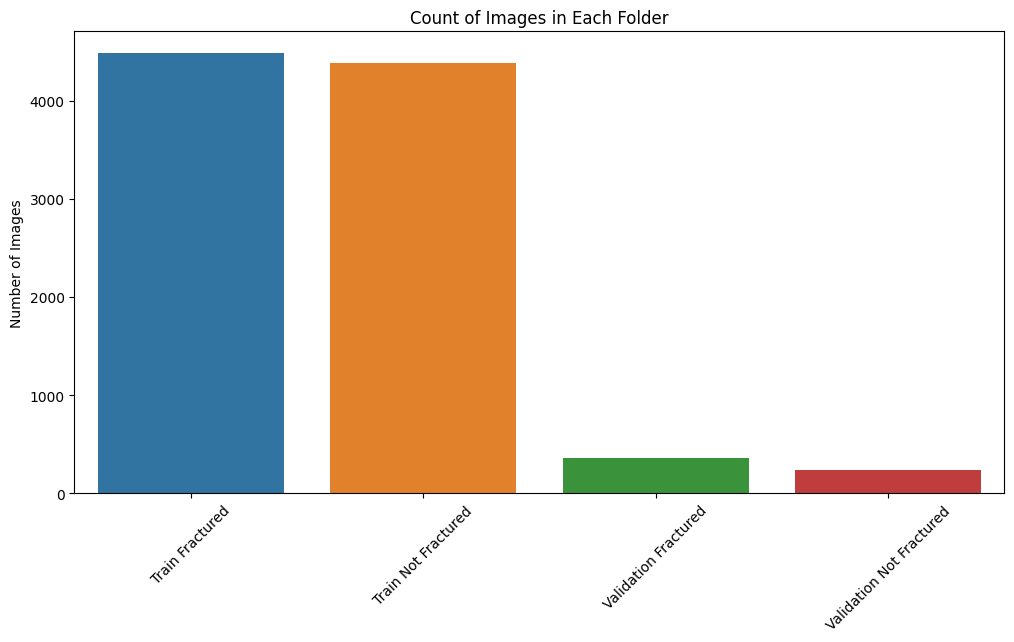

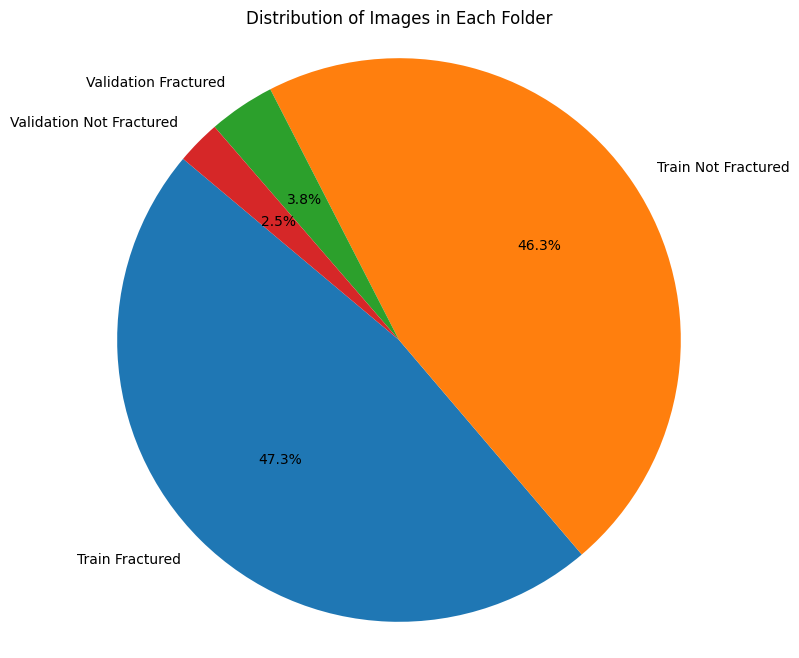

In [5]:
labels = ['Train Fractured', 'Train Not Fractured', 'Validation Fractured', 'Validation Not Fractured']
counts = [train_fractured_count, train_not_fractured_count, val_fractured_count, val_not_fractured_count]

plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of Images in Each Folder')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Each Folder')
plt.axis('equal')  
plt.show()

Sample Images from Train Fractured:


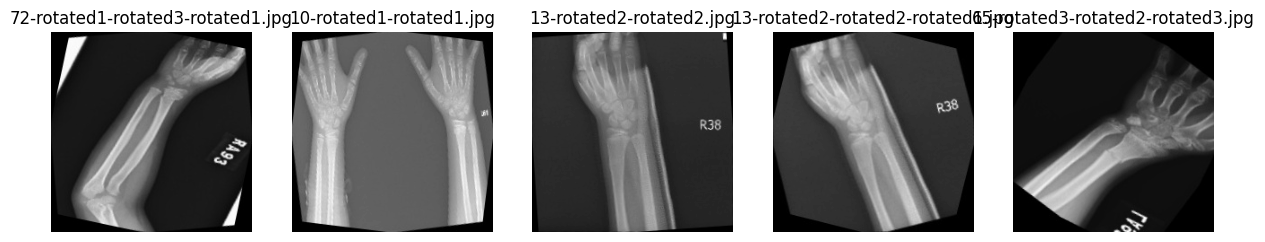

Sample Images from Train Not Fractured:


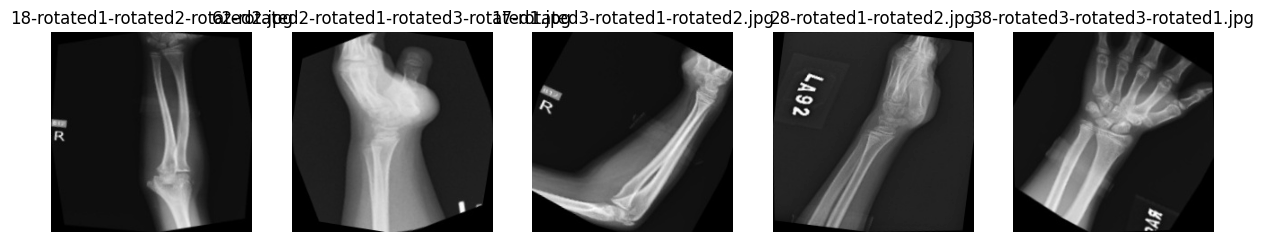

Sample Images from Validation Fractured:


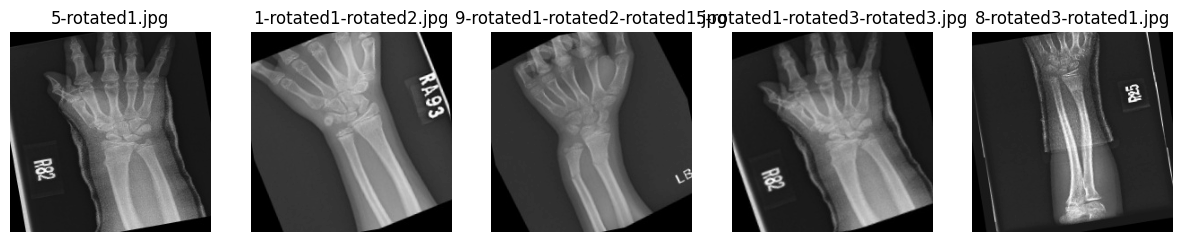

Sample Images from Validation Not Fractured:


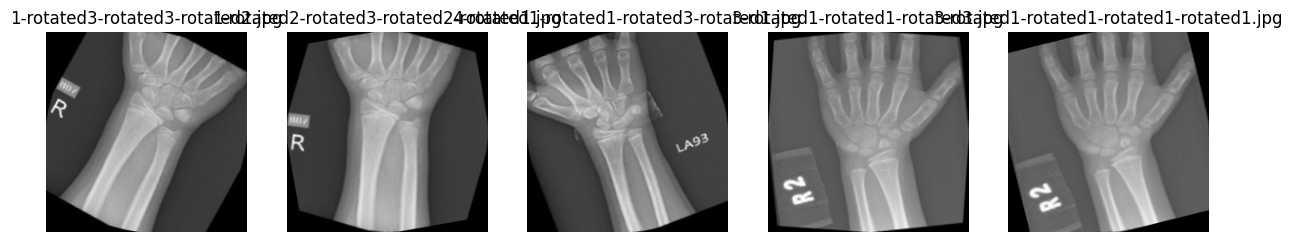

In [6]:
def display_images(folder, count=5):
    images = os.listdir(folder)
    selected_images = np.random.choice(images, count, replace=False)
    
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        
        plt.subplot(1, count, i + 1)
        plt.imshow(img, cmap='gray') 
        plt.axis('off')
        plt.title(img_name)
    plt.show()

print("Sample Images from Train Fractured:")
display_images(train_fractured_dir)

print("Sample Images from Train Not Fractured:")
display_images(train_not_fractured_dir)

print("Sample Images from Validation Fractured:")
display_images(val_fractured_dir)

print("Sample Images from Validation Not Fractured:")
display_images(val_not_fractured_dir)

In [7]:
fractured_images = os.listdir(train_fractured_dir)
not_fractured_images = os.listdir(train_not_fractured_dir)

df_fractured = pd.DataFrame({
    'filename': fractured_images,
    'label': 'fractured'
})
df_not_fractured = pd.DataFrame({
    'filename': not_fractured_images,
    'label': 'not fractured'
})

df = pd.concat([df_fractured, df_not_fractured], ignore_index=True)

df['file_path'] = df.apply(lambda row: os.path.join(train_fractured_dir if row['label'] == 'fractured' else train_not_fractured_dir, row['filename']), axis=1)

In [8]:
df = df[['file_path', 'label']]

In [9]:
df

,file_path,label
0,/kaggle/input/bone-fracture-detection-using-xr...,fractured
1,/kaggle/input/bone-fracture-detection-using-xr...,fractured
2,/kaggle/input/bone-fracture-detection-using-xr...,fractured
3,/kaggle/input/bone-fracture-detection-using-xr...,fractured
4,/kaggle/input/bone-fracture-detection-using-xr...,fractured
...,...,...
8858,/kaggle/input/bone-fracture-detection-using-xr...,not fractured
8859,/kaggle/input/bone-fracture-detection-using-xr...,not fractured
8860,/kaggle/input/bone-fracture-detection-using-xr...,not fractured
8861,/kaggle/input/bone-fracture-detection-using-xr...,not fractured


In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['label'])

In [12]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['label'] = y_resampled

In [13]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
fractured        4480
not fractured    4480
Name: count, dtype: int64


In [14]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [72]:
df_resampled.to_csv('bone_fracture.csv')

In [15]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 1 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='grayscale', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='grayscale', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='grayscale', 
    shuffle=False,  
    batch_size=batch_size
)

Found 7168 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 7168 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

def create_vgg16_modified_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    
    x = base_model.output
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.3)(x)
    
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_modified_model = create_vgg16_modified_model(input_shape)

cnn_modified_model.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
history = cnn_modified_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3


I0000 00:00:1731766315.673470     169 service.cc:145] XLA service 0x7c9ca4002460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731766315.673552     169 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731766315.673559     169 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731766329.159328     210 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_73', 268 bytes spill stores, 268 bytes spill loads

I0000 00:00:1731766332.087323     207 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_15', 1788 bytes spill stores, 1776 bytes spill loads

I0000 00:00:1731766338.235488     209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 1284 bytes spill stores, 1272 bytes spill loads



  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:15:26 42s/step - accuracy: 0.2500 - loss: 0.9237

I0000 00:00:1731766352.396789     169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/448 ━━━━━━━━━━━━━━━━━━━━ 160s 264ms/step - accuracy: 0.6941 - loss: 0.5564 - val_accuracy: 0.8315 - val_loss: 0.3619
Epoch 2/3
448/448 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.9184 - loss: 0.1991 - val_accuracy: 0.9866 - val_loss: 0.0405
Epoch 3/3
448/448 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.9554 - loss: 0.1217 - val_accuracy: 0.9397 - val_loss: 0.1499


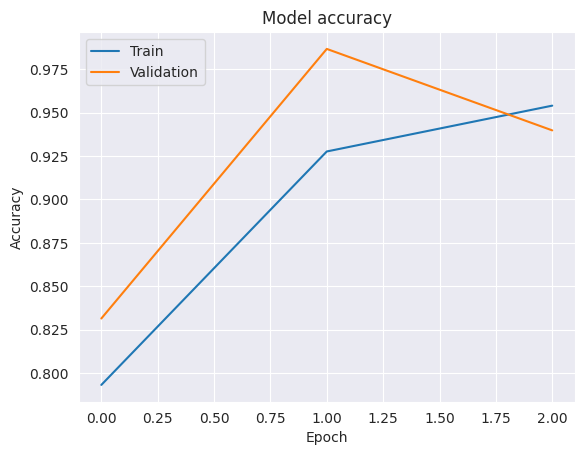

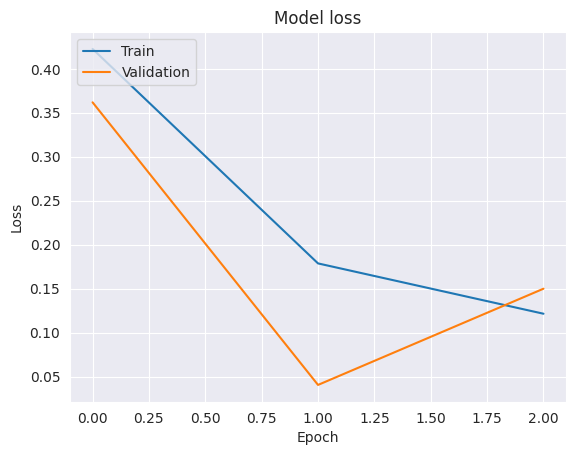

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
test_labels = test_gen_new.classes  
predictions = cnn_modified_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step


In [27]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

               precision    recall  f1-score   support

    fractured       0.99      0.99      0.99       448
not fractured       0.99      0.99      0.99       448

     accuracy                           0.99       896
    macro avg       0.99      0.99      0.99       896
 weighted avg       0.99      0.99      0.99       896



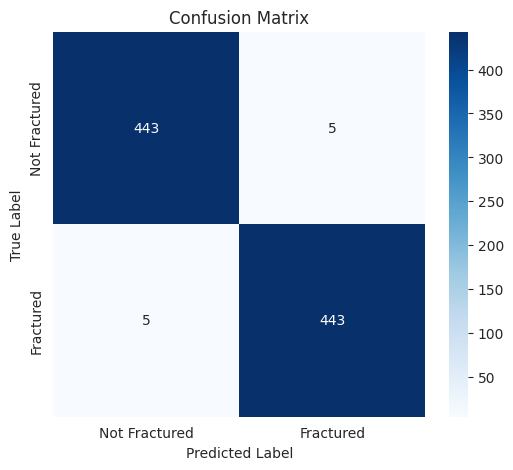

In [28]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [98]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 1)  
num_classes = 1  

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [99]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [101]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6647 - loss: 0.5987 - val_accuracy: 0.8940 - val_loss: 0.2601
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9345 - loss: 0.1682 - val_accuracy: 0.9688 - val_loss: 0.0823
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 0.9576 - val_loss: 0.1196
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9710 - val_loss: 0.1252
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9953 - loss: 0.0109 - val_accuracy: 0.9710 - val_loss: 0.1165
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.9754 - val_loss: 0.0964
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9799 - val_loss: 0.0993


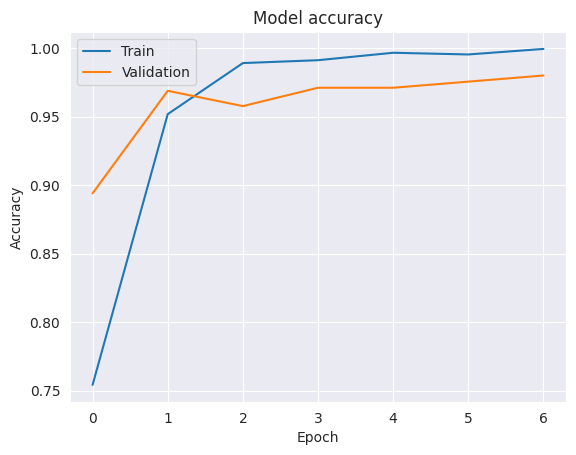

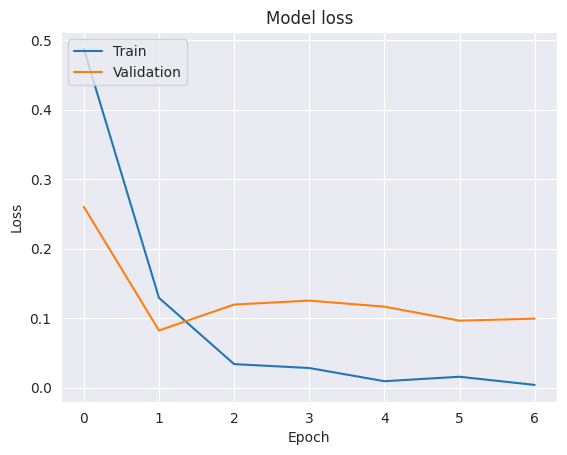

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [103]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [104]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

               precision    recall  f1-score   support

    fractured       0.50      0.50      0.50       448
not fractured       0.50      0.51      0.51       448

     accuracy                           0.50       896
    macro avg       0.50      0.50      0.50       896
 weighted avg       0.50      0.50      0.50       896



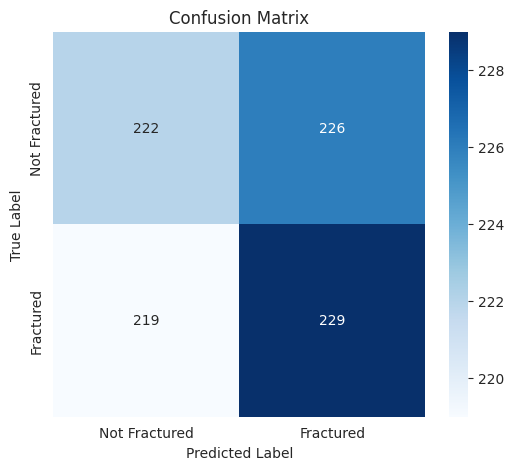

In [106]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 1 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 7168 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.


In [85]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)  
num_classes = 1  

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [86]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.6854 - loss: 0.5999 - val_accuracy: 0.8929 - val_loss: 0.2409
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9437 - loss: 0.1580 - val_accuracy: 0.9665 - val_loss: 0.0860
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9863 - loss: 0.0399 - val_accuracy: 0.9732 - val_loss: 0.1055
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9833 - val_loss: 0.0477
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9952 - loss: 0.0095 - val_accuracy: 0.9821 - val_loss: 0.0589
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9955 - loss: 0.0111 - val_accuracy: 0.9777 - val_loss: 0.0733
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9937 - loss: 0.0242 - val_accuracy: 0.9754 - val_loss: 0.0787
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9994 - loss: 9.2089e-0

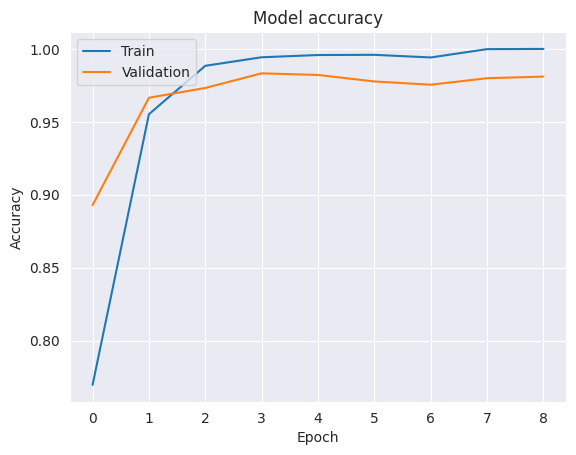

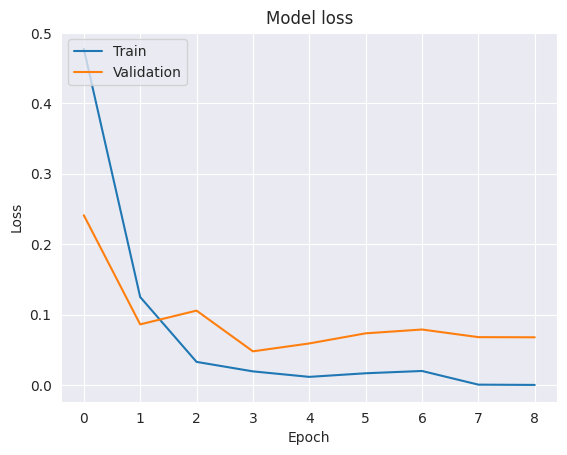

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [90]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


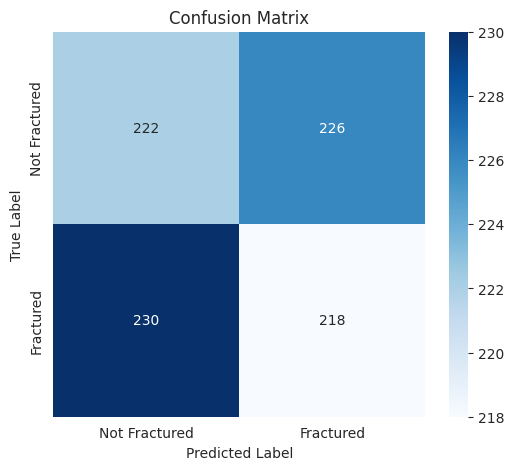

In [92]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
report = classification_report(test_labels, predicted_labels, target_names=['Not Fractured', 'Fractured'])
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Fractured       0.49      0.50      0.49       448
    Fractured       0.49      0.49      0.49       448

     accuracy                           0.49       896
    macro avg       0.49      0.49      0.49       896
 weighted avg       0.49      0.49      0.49       896



In [107]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def create_efficientnet_model(input_shape):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    base_model.trainable = False

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D()) 
    model.add(layers.Dense(128, activation='relu'))  
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_efficientnet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [108]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.4899 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.4992 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.4935 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.4924 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931


In [109]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_efficientnet_b3_model(input_shape):
   
    base_model = EfficientNetB3(weights='imagenet', input_shape=input_shape, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu')) 
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)
cnn_model = create_efficientnet_b3_model(input_shape)


cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [110]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 96s 69ms/step - accuracy: 0.4990 - loss: 0.8065 - val_accuracy: 0.5000 - val_loss: 0.7321
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5048 - loss: 0.7755 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5113 - loss: 0.7603 - val_accuracy: 0.5000 - val_loss: 0.8406
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5115 - loss: 0.7450 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5146 - loss: 0.7493 - val_accuracy: 0.5000 - val_loss: 0.9072


In [111]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [112]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - accuracy: 0.7480 - loss: 0.5134 - val_accuracy: 0.9208 - val_loss: 0.2498
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9046 - loss: 0.2300 - val_accuracy: 0.9576 - val_loss: 0.1383
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9386 - loss: 0.1644 - val_accuracy: 0.9208 - val_loss: 0.1922
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9586 - loss: 0.1205 - val_accuracy: 0.9621 - val_loss: 0.1034
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9721 - loss: 0.0919 - val_accuracy: 0.9810 - val_loss: 0.0644
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9738 - loss: 0.0843 - val_accuracy: 0.9777 - val_loss: 0.0761
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9760 - loss: 0.0730 - val_accuracy: 0.9855 - val_loss: 0.0638
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9835 - loss: 0.0576 - 

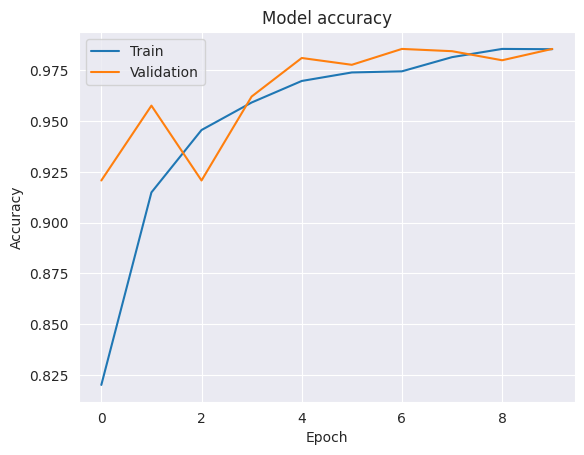

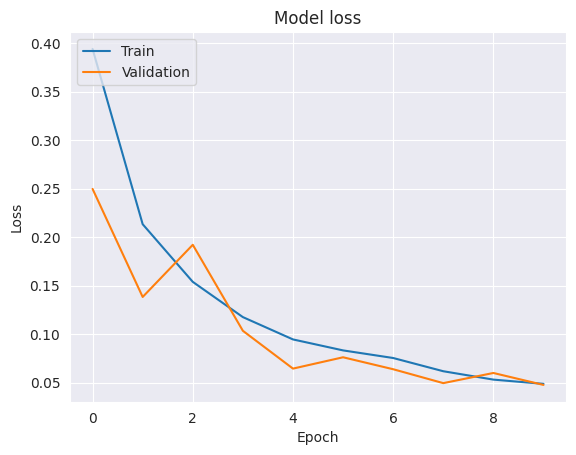

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [118]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step


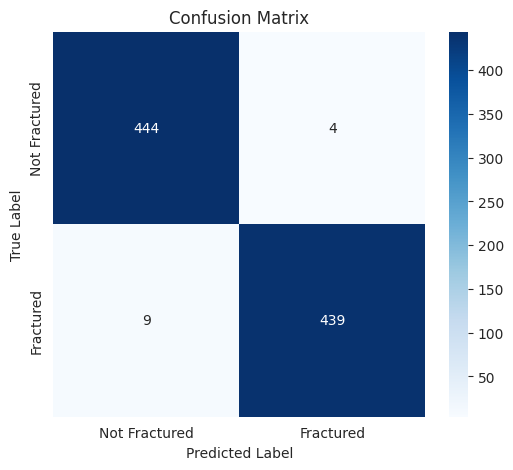

In [119]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [120]:
report = classification_report(test_labels, predicted_labels, target_names=['Not Fractured', 'Fractured'])
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Fractured       0.98      0.99      0.99       448
    Fractured       0.99      0.98      0.99       448

     accuracy                           0.99       896
    macro avg       0.99      0.99      0.99       896
 weighted avg       0.99      0.99      0.99       896



In [121]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_resnet_model(input_shape):
   
    base_model = ResNet50(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25)) 
    model.add(Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_resnet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [122]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.5565 - loss: 0.7545 - val_accuracy: 0.5045 - val_loss: 1.4015
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6057 - loss: 0.6970 - val_accuracy: 0.5134 - val_loss: 0.8171
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.6287 - loss: 0.6567 - val_accuracy: 0.5714 - val_loss: 0.8202
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6278 - loss: 0.6644 - val_accuracy: 0.5000 - val_loss: 2.2344
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6534 - loss: 0.6301 - val_accuracy: 0.6272 - val_loss: 0.6227


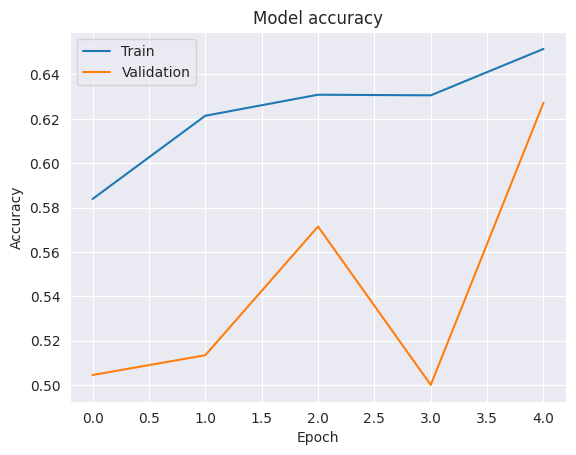

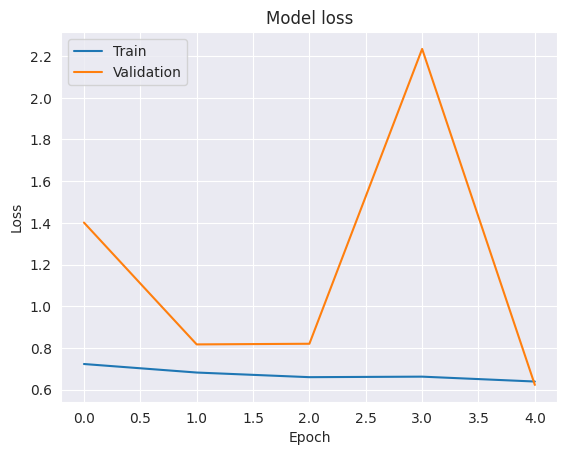

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [125]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step


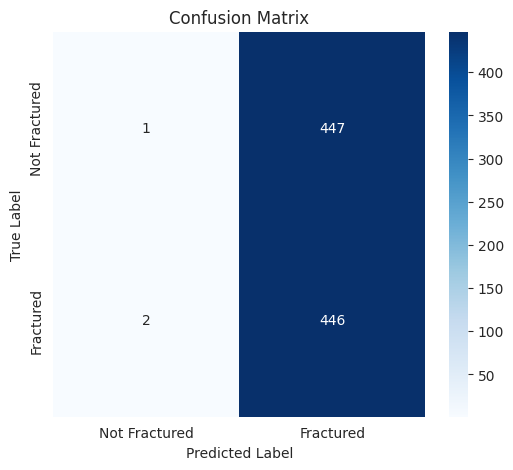

In [126]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fractured', 'Fractured'], yticklabels=['Not Fractured', 'Fractured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [127]:
report = classification_report(test_labels, predicted_labels, target_names=['Not Fractured', 'Fractured'])
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Fractured       0.33      0.00      0.00       448
    Fractured       0.50      1.00      0.67       448

     accuracy                           0.50       896
    macro avg       0.42      0.50      0.33       896
 weighted avg       0.42      0.50      0.33       896

